In [1]:
!pip install kaggle

# New Section

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 71% 116M/163M [00:00<00:00, 1.21GB/s]
100% 163M/163M [00:00<00:00, 1.04GB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1136.jpg', 'with_mask_208.jpg', 'with_mask_994.jpg', 'with_mask_1981.jpg', 'with_mask_3003.jpg']
['with_mask_940.jpg', 'with_mask_691.jpg', 'with_mask_3204.jpg', 'with_mask_2013.jpg', 'with_mask_2072.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1971.jpg', 'without_mask_2253.jpg', 'without_mask_1136.jpg', 'without_mask_80.jpg', 'without_mask_2949.jpg']
['without_mask_954.jpg', 'without_mask_2766.jpg', 'without_mask_616.jpg', 'without_mask_3767.jpg', 'without_mask_1952.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

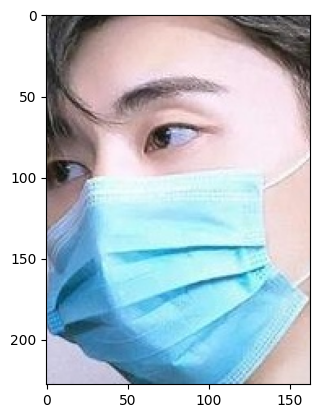

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

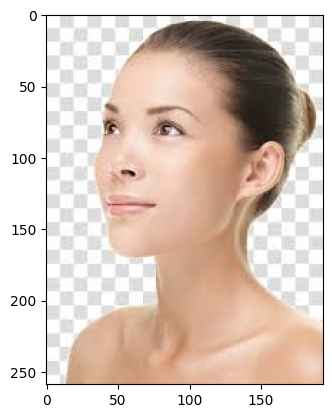

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[ 39,  34,  40],
        [ 38,  33,  39],
        [ 36,  33,  38],
        ...,
        [234, 235, 229],
        [234, 235, 229],
        [234, 235, 229]],

       [[ 43,  37,  43],
        [ 40,  35,  41],
        [ 39,  34,  40],
        ...,
        [234, 235, 229],
        [234, 235, 229],
        [234, 235, 229]],

       [[ 41,  34,  41],
        [ 39,  33,  40],
        [ 38,  32,  39],
        ...,
        [234, 235, 229],
        [234, 235, 229],
        [234, 235, 229]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 254, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 255]]], dtype=uint8)
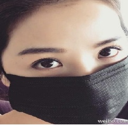

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 90,  64,  63],
        [ 86,  62,  60],
        [ 89,  66,  62],
        ...,
        [255, 253, 255],
        [255, 253, 255],
        [255, 253, 255]],

       [[ 90,  65,  64],
        [ 89,  65,  63],
        [ 90,  68,  64],
        ...,
        [255, 253, 255],
        [255, 253, 255],
        [255, 253, 255]],

       [[ 89,  66,  63],
        [ 89,  68,  64],
        [ 89,  68,  63],
        ...,
        [255, 253, 255],
        [255, 253, 255],
        [255, 253, 255]],

       ...,

       [[143, 150, 160],
        [144, 151, 161],
        [143, 152, 159],
        ...,
        [ 55,  97, 111],
        [ 53,  99, 114],
        [ 50,  98, 112]],

       [[143, 150, 160],
        [143, 152, 161],
        [140, 151, 157],
        ...,
        [ 61, 104, 118],
        [ 56,  99, 116],
        [ 51,  97, 112]],

       [[143, 153, 161],
        [143, 152, 161],
        [141, 152, 158],
        ...,
        [ 61, 103, 118],
        [ 55,  98, 115],
        [ 51,  97, 112]]], dtype=uint8)
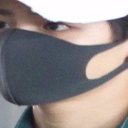

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.35294118, 0.25098039, 0.24705882],
        [0.3372549 , 0.24313725, 0.23529412],
        [0.34901961, 0.25882353, 0.24313725],
        ...,
        [1.        , 0.99215686, 1.        ],
        [1.        , 0.99215686, 1.        ],
        [1.        , 0.99215686, 1.        ]],

       [[0.35294118, 0.25490196, 0.25098039],
        [0.34901961, 0.25490196, 0.24705882],
        [0.35294118, 0.26666667, 0.25098039],
        ...,
        [1.        , 0.99215686, 1.        ],
        [1.        , 0.99215686, 1.        ],
        [1.        , 0.99215686, 1.        ]],

       [[0.34901961, 0.25882353, 0.24705882],
        [0.34901961, 0.26666667, 0.25098039],
        [0.34901961, 0.26666667, 0.24705882],
        ...,
        [1.        , 0.99215686, 1.        ],
        [1.        , 0.99215686, 1.        ],
        [1.        , 0.99215686, 1.        ]],

       ...,

       [[0.56078431, 0.58823529, 0.62745098],
        [0.56470588, 0.59215686, 0.63137255],
        [0.56078431, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - acc: 0.6889 - loss: 0.7363 - val_acc: 0.8843 - val_loss: 0.2655
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8821 - loss: 0.3053 - val_acc: 0.8959 - val_loss: 0.2441
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9000 - loss: 0.2518 - val_acc: 0.9041 - val_loss: 0.2567
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9234 - loss: 0.2088 - val_acc: 0.9058 - val_loss: 0.2214
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9315 - loss: 0.1741 - val_acc: 0.9223 - val_loss: 0.2007


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9292 - loss: 0.1670
Test Accuracy = 0.9278623461723328


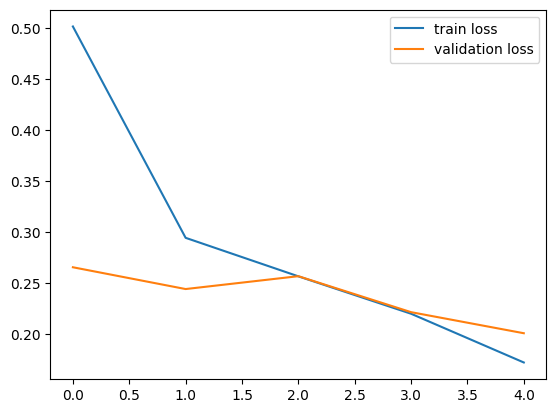

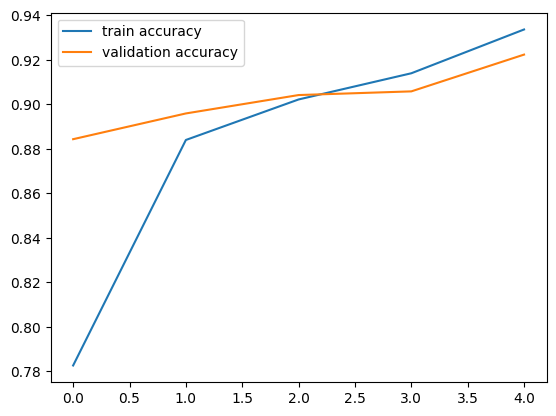

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test1.jpeg


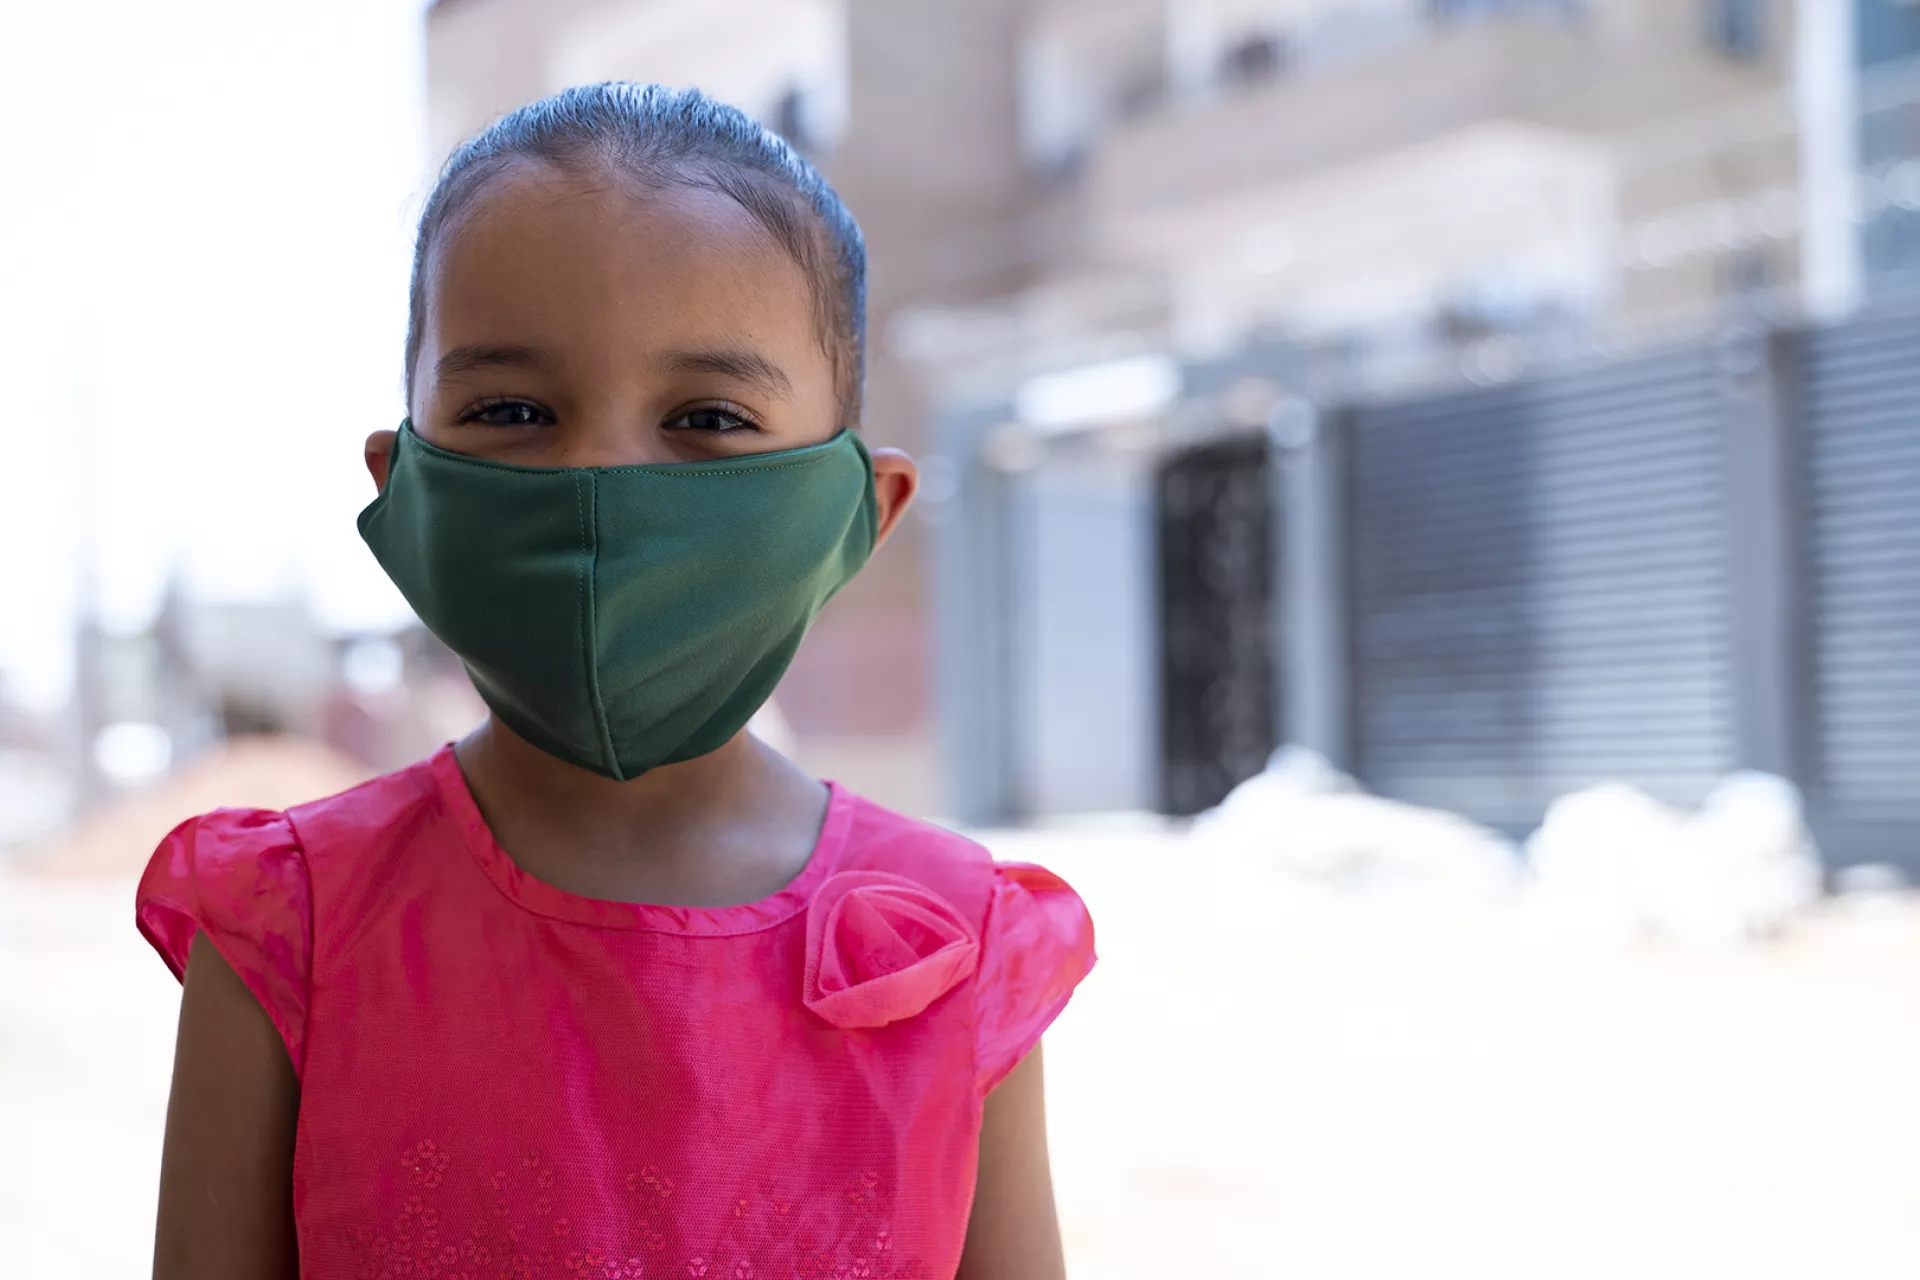

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
[[0.5175624  0.51991004]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/nomask.jpeg


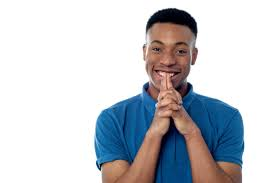

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.5609363  0.45814905]]
0
The person in the image is not wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')